In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import h2o
from h2o.automl import H2OAutoML

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"

df["Age"].fillna(df["Age"].median(), inplace=True)
df.dropna(subset=["Fare"], inplace=True)
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

In [ ]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "AUC-ROC": auc_roc}
    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74


In [14]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-17.0.13+11 (build 17.0.13+11, mixed mode, sharing)
  Starting server from K:\Computer Science\AIMLDL\AI-ML-DL\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\krish\AppData\Local\Temp\tmprrv8ou50
  JVM stdout: C:\Users\krish\AppData\Local\Temp\tmprrv8ou50\h2o_krish_started_from_python.out
  JVM stderr: C:\Users\krish\AppData\Local\Temp\tmprrv8ou50\h2o_krish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_krish_gqz1qc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.949 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [15]:
data_h2o = h2o.H2OFrame(df)
data_h2o["Sex"] = data_h2o["Sex"].asfactor()
data_h2o["Survived"] = data_h2o["Survived"].asfactor()

train, test = data_h2o.split_frame(ratios=[0.8])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
ml = H2OAutoML(max_models=10, seed=42)
aml.train(x=features, y=target, training_frame=train)


04:34:11.139: AutoML: XGBoost is not available; skipping it.



key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [17]:
leader = aml.leader
y_pred_h2o = leader.predict(test).as_data_frame()["predict"].astype(int)
y_test_h2o = test[target].as_data_frame().astype(int)

accuracy_h2o = accuracy_score(y_test_h2o, y_pred_h2o)
auc_roc_h2o = roc_auc_score(y_test_h2o, y_pred_h2o)

results["H2O AutoML"] = {"Accuracy": accuracy_h2o, "AUC-ROC": auc_roc_h2o}

results_df = pd.DataFrame(results).T
results_df

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,Accuracy,AUC-ROC
Logistic Regression,0.798883,0.786680
Random Forest,0.798883,0.788674
XGBoost,0.804469,0.797426
H2O AutoML,0.859459,0.848333


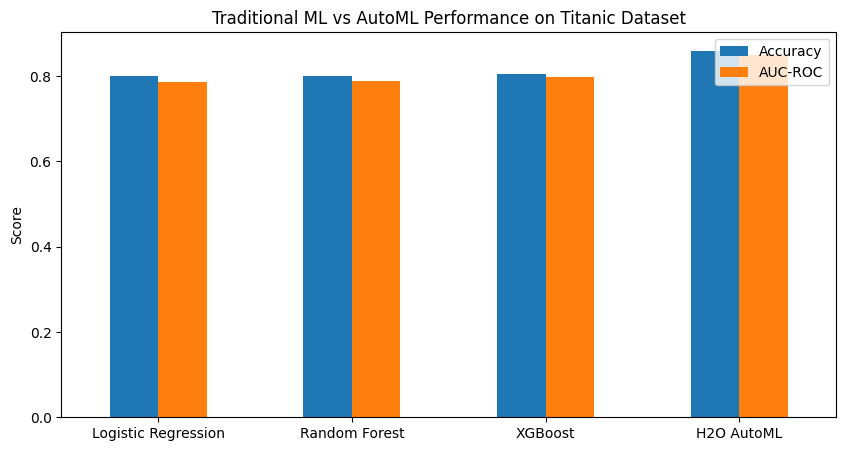

In [27]:
results_df.plot(kind="bar", figsize=(10, 5))
plt.title("Traditional ML vs AutoML Performance on Titanic Dataset")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()